# Exploraty Data Analysis

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df_accounts = pd.read_csv("../data/raw/crm-sales-opportunities/accounts.csv")
df_products = pd.read_csv("../data/raw/crm-sales-opportunities/products.csv")
df_teams = pd.read_csv("../data/raw/crm-sales-opportunities/sales_teams.csv")
df_sales = pd.read_csv(
    "../data/raw/crm-sales-opportunities/sales_pipeline.csv")


## Sales pipeline

### Cleaning

In [ ]:
df_sales.head(10)


,opportunity_id,sales_agent,product,account,deal_stage,engage_date,close_date,close_value
0,1C1I7A6R,Moses Frase,GTX Plus Basic,Cancity,Won,2016-10-20,2017-03-01,1054.0
1,Z063OYW0,Darcel Schlecht,GTXPro,Isdom,Won,2016-10-25,2017-03-11,4514.0
2,EC4QE1BX,Darcel Schlecht,MG Special,Cancity,Won,2016-10-25,2017-03-07,50.0
3,MV1LWRNH,Moses Frase,GTX Basic,Codehow,Won,2016-10-25,2017-03-09,588.0
4,PE84CX4O,Zane Levy,GTX Basic,Hatfan,Won,2016-10-25,2017-03-02,517.0
5,ZNBS69V1,Anna Snelling,MG Special,Ron-tech,Won,2016-10-29,2017-03-01,49.0
6,9ME3374G,Vicki Laflamme,MG Special,J-Texon,Won,2016-10-30,2017-03-02,57.0
7,7GN8Q4LL,Markita Hansen,GTX Basic,Cheers,Won,2016-11-01,2017-03-07,601.0
8,OLK9LKZB,Niesha Huffines,GTX Plus Basic,Zumgoity,Won,2016-11-01,2017-03-03,1026.0
9,HAXMC4IX,James Ascencio,MG Advanced,NaN,Engaging,2016-11-03,NaN,NaN


Remove non relevant rows where the deal is still in progress:

In [ ]:
df_sales_clean = df_sales.copy().dropna(subset=['close_value'])
total_sales = df_sales.shape[0]
actual_sales = df_sales_clean.shape[0]
print(f"{total_sales} sales in total")
print(f"{actual_sales} actual sales")
print(f"{total_sales - actual_sales} still prospecting")


8800 sales in total
6711 actual sales
2089 still prospecting


There are only two type of sale status: `Won` or `Lost`:

In [ ]:
df_sales_clean['deal_stage'].unique()


array(['Won', 'Lost'], dtype=object)

Transform this into a binary column:

In [ ]:
df_sales_clean['deal_stage'] = df_sales_clean['deal_stage'].apply(
    lambda x: 1 if x.lower() == 'won' else 0)
df_sales_clean['deal_stage'].value_counts()


deal_stage
1    4238
0    2473
Name: count, dtype: int64

Transform dates and integers columns:

In [ ]:
df_sales_clean['engage_date'] = pd.to_datetime(df_sales_clean['engage_date'])
df_sales_clean['close_date'] = pd.to_datetime(df_sales_clean['close_date'])
df_sales_clean['close_value'] = pd.to_numeric(
    df_sales_clean['close_value'], downcast='integer')


The rest of the columns are strings:

In [ ]:
for col in ['opportunity_id', 'sales_agent', 'product', 'account']:
    df_sales_clean[col] = df_sales_clean[col].astype('string')


In [ ]:
df_sales_clean.dtypes


opportunity_id    string[python]
sales_agent       string[python]
product           string[python]
account           string[python]
deal_stage                 int64
engage_date       datetime64[ns]
close_date        datetime64[ns]
close_value                int16
dtype: object

### Preprocessing

In [ ]:
df_sales_clean


,opportunity_id,sales_agent,product,account,deal_stage,engage_date,close_date,close_value
0,1C1I7A6R,Moses Frase,GTX Plus Basic,Cancity,1,2016-10-20,2017-03-01,1054
1,Z063OYW0,Darcel Schlecht,GTXPro,Isdom,1,2016-10-25,2017-03-11,4514
2,EC4QE1BX,Darcel Schlecht,MG Special,Cancity,1,2016-10-25,2017-03-07,50
3,MV1LWRNH,Moses Frase,GTX Basic,Codehow,1,2016-10-25,2017-03-09,588
4,PE84CX4O,Zane Levy,GTX Basic,Hatfan,1,2016-10-25,2017-03-02,517
...,...,...,...,...,...,...,...,...
8295,2EBLR9N8,Lajuana Vencill,GTX Basic,Conecom,1,2017-12-24,2017-12-26,622
8296,VDGA4KXA,Violet Mclelland,GTX Plus Basic,Bluth Company,1,2017-12-24,2017-12-30,1093
8297,6WCNNK5J,Maureen Marcano,GTXPro,Hottechi,1,2017-12-26,2017-12-29,4433
8298,YJTQSZ9D,Gladys Colclough,GTX Plus Basic,Inity,1,2017-12-27,2017-12-30,1052


In [ ]:
df_sales_clean['duration_days'] = df_sales_clean['close_date'] - \
    df_sales_clean['engage_date']
duration_counts = pd.Series(
    df_sales_clean['duration_days'].value_counts()).reset_index()
duration_counts['duration'] = duration_counts['duration_days'].dt.days
duration_counts_sorted = duration_counts.sort_values(
    by='duration', ascending=True)
duration_counts_sorted.drop(columns=['duration_days'], inplace=True)


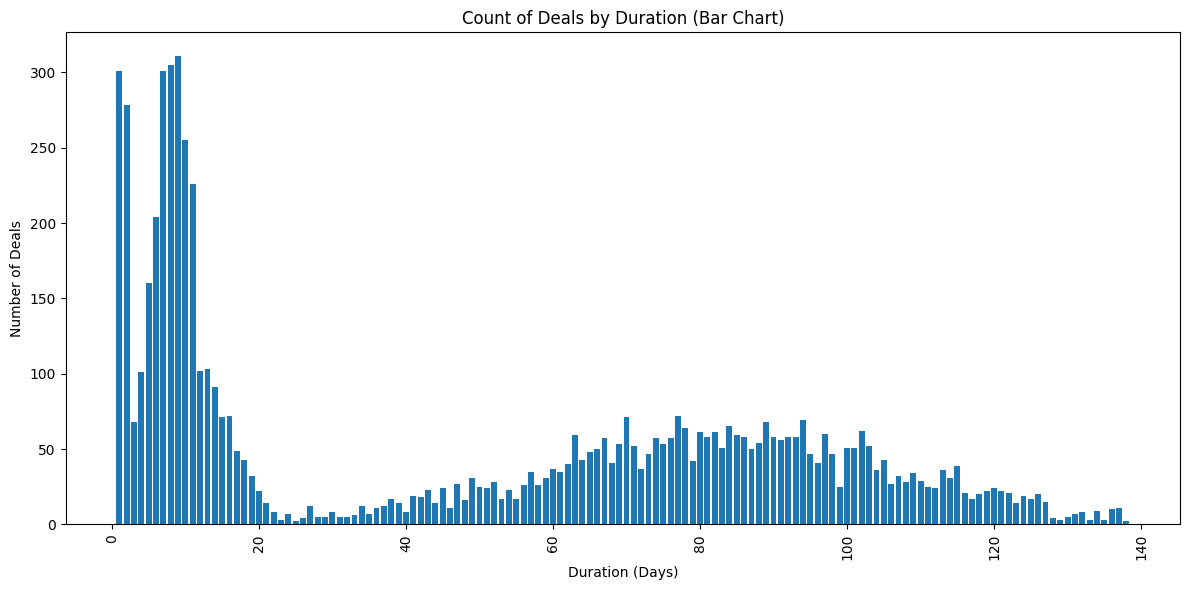

In [ ]:
plt.figure(figsize=(12, 6))  # Adjust figure size for better readability
plt.bar(height=duration_counts_sorted['count'],
        x=duration_counts_sorted['duration'])
plt.title('Count of Deals by Duration (Bar Chart)')
plt.xlabel('Duration (Days)')
plt.ylabel('Number of Deals')
plt.xticks(rotation=90)  # Rotate x-axis labels if they overlap
plt.tight_layout()  # Adjust layout to prevent labels from being cut off
plt.show()
